# Video: Bias and Variance of Polynomials

This video illustrates tradeoffs between bias and variance using polynomials of different degrees.

## Polynomial Refresher

* What's a polynomial?
  * $f(x) = a_k x^k + a_{k-1} x^{k-1} + \ldots + a_1 x^1 + a_0$
* Polynomial degree = maximum exponent allowed
  * Degree 1 is linear
  * Degree 2 is quadratic
  * Degree 3 is cubic
  * ...
* Also can have polynomials with multiple variables...

Script:
* Polynomials are a common form for expressions and equations.
* They include linear functions as used in linear regression.
* They also include quadratic functions that are used in the $L_2$ loss function.
* For this video, I will focus on polynomials with just one variable and only integer exponents.
* With those restrictions, a polynomial is a sum of the variable to different powers, multiplied by a coefficient for each power.
* This might feel similar to linear equations.
* Polynomials of one variable distinguish terms using exponents instead of different variables.
* But we will be able to use that similarity to regress polynomials as easily as linear models.

## The Standard Bias and Variance Argument for Polynomials

* A polynomial of degree $k$ can always fit $k+1$ points.
  * Often overfitting here.
* A polynomial of degree $k$ can not always fit $k+2$ points.
  * Maybe not overfitting here?


Script:
* I won't prove these claims now, but you will see some hints later.
* If you have a polynomial of degree $k$, then there are $k+1$ coefficients including the additive constant.
* And polynomials are flexible enough to fit any $k+1$ values with distinct inputs.
* But there are choices of $k+2$ inputs and outputs where no degree $k$ polynomial can fit them.
* From these observations, the argument is that up to $k+1$ points, arbitrary noise can be fit.
* So there is no pressure in the polynomial regression to make a nice smooth function, and it can fit arbitrary contortions that fit within those $k+1$ points.
* This is all true, but I find it lacking since it doesn't address what actually happens.

## Bias and Variance of Polynomials

* High degree polynomials are more expressive than low degree polynomials.
  * Set high degree coefficients to zero to lower degree.
  * Higher degree means less bias.
  * Higher degree means more variance.

Script:
* If you have a high degree polynomial, you can express anything that could be expressed with a low degree polynomial.
* Just set the coefficients for the higher powers to zero, and your high degree polynomial is effectively low degree.
* This means a higher degree polynomial will never have higher bias than a lower degree polynomial.
* It can always match the bias of the lower degree polynomial by using zeros for the high degree coefficients.
* And similarly, it should always have higher variance, since it has all the choices of lower degree polynomials and more.
* That argument is more handwavy than the bias one; claims about variance are about what distributions of models rather than limitations of models.


## What Happens When You Fit Another Point?


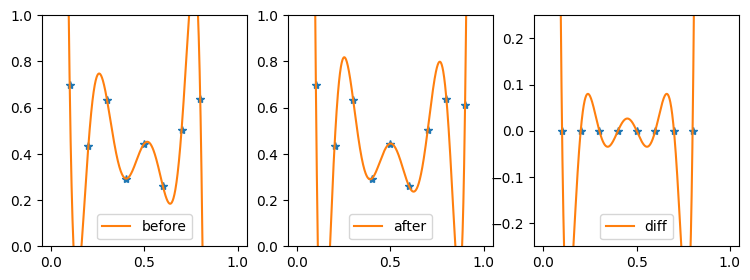

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import sklearn.preprocessing

def make_model(xs_train, ys_train):
    xs_train = xs_train.reshape(-1, 1)
    ys_train = ys_train.reshape(-1, 1)
    preprocessing = sklearn.preprocessing.PolynomialFeatures(degree=len(xs_train)-1, include_bias=False)
    preprocessing.fit(xs_train)
    preprocessing.transform(xs_train)

    model = sklearn.linear_model.LinearRegression()
    model.fit(preprocessing.transform(xs_train), ys_train)

    return lambda xs: model.predict(preprocessing.transform(xs.reshape(-1, 1)))

xs_train = np.linspace(0.1, 0.9, 9)
ys_train = np.random.uniform(0.25, 0.75, size=xs_train.shape)

xs = np.linspace(0, 1, num=1000)
ys = np.random.uniform(0, 1, size=xs.shape)

plt.figure(figsize=(9,3))

plt.subplot(1, 3, 1)
plt.plot(xs_train[:-1], ys_train[:-1], "*")
first_model = make_model(xs_train[:-1], ys_train[:-1])
plt.plot(xs, first_model(xs), label="before")
plt.gca().set_ylim(0, 1)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(xs_train, ys_train, "*")
second_model = make_model(xs_train, ys_train)
plt.plot(xs, second_model(xs), label="after")
plt.gca().set_ylim(0, 1)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(xs_train[:-1], [0 for _ in xs_train[:-1]], "*")
plt.plot(xs, second_model(xs) - first_model(xs), label="diff")
plt.gca().set_ylim(-0.25, 0.25)
plt.legend()

None

Script:
* For polynomials, I think it is very illuminating to look at how the polynomial changes as you fit more points exactly.
* The first chart shows 8 sample points, and the degree 7 polynomial exactly fitting them.
* The second chart shows the same sample points plus a 9th point, and the degree 8 polynomial exactly fitting them.
* The third chart shows the difference between those two models which is also a degree 8 polynomial.
* The first 8 sample points are also marked.
* The difference between those models is constrained to be zero at the first 8 sample inputs.
* Otherwise their outputs would change and the new model would not fit them exactly.
* Because they are constrained to be zero, you can see the difference oscillating back and forth.
* That is the effect that I previously referred to as arbitrary contortions.
* For inputs less than the first point, all the values increased substantially.
* And that is from adding a new sample all the way on the right past all the other sample points.
* In between the first and second samples, the predictions went down.
* Between the second and third samples, the predictions went up.
* Then down and up over and over again until the last of the old sample points.
* So the changes in predictions from adding this new sample point were oscillating all over.
* These patterns are very common with polynomial regressions.
* And that's why they have high variance.
* Each new point can change the predictions all over.


## Bias and Variance of Polynomials

How do bias and variance of polynomials change with the polynomial degree?
* One input variable, limited polynomial degrees.
* Test bias with lots of training samples.
* Test variance with fewer samples, more repetitions.

Script:
* So now you have seen the standard arguments about bias and variance of polynomials, and I showed you explicitly how adding one point changes predictions wildly.
* Now, I'd like to how they behave in a more realistic situation where the polynomial degree does not grow with the number of data points.
* This is a less traditional way to look at bias and variance of models, but I think will give you a more practical intuition than the argument using unrealistically high degrees.
* This will help you pick candidate models later.

## Loss Functions in These Examples

* Loss function did not matter with exact fits.
* Will use $L_2$ for all examples now.
* Similar results with other loss functions.


Script:
* In these examples, I will be focusing on the qualitative behavior and not considering loss functions.
* Loss functions were not relevant in the previous examples, since all the training data points were fit exactly.

* All the models we look at will be optimized using $L_2$ loss.
* I will not be talking about the code, but you can see all of the code to create these charts in the notebook linked after this video.

## Assessing Bias


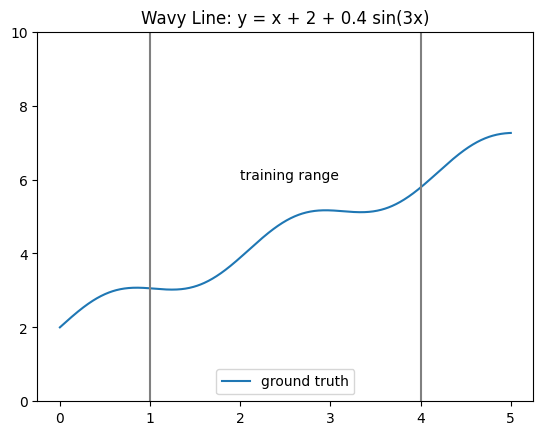

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def wavy(x):
    return x + 2 + 0.4 * np.sin(3 * x)

xs = np.linspace(0, 5, num=1000).reshape(-1, 1)
plt.gca().set_ylim(0, 10)
plt.plot(xs, wavy(xs), label="ground truth")

plt.legend()
plt.title("Wavy Line: y = x + 2 + 0.4 sin(3x)")
plt.axvline(1, color="grey")
plt.axvline(4, color="grey")

plt.annotate("training range", (2, 6))
# plt.annotate("check bias", (2, 2))
# plt.annotate("generalize?", (0, 4))
# plt.annotate("variance?", (0, 1))
# plt.annotate("generalize?", (4.25, 7.5))
# plt.annotate("variance?", (4.25, 3.5))

None

Script:
* At the beginning of module 1, I used a function similar to this one to demonstrate linear regression.
* I tweaked the coefficients to be make these examples a little more interesting.
* The basic form of this function is a line with a periodic up and down component added using the sine function.
* The best polynomial for this function overall would be a line if we trained with data over a broad range, but the limited training range here will be fit by other polynomials more closely.
* I will train polynomials of increasing degree with ten thousand samples in the middle range from x = 1 to 4.
* We can solve polynomial regressions exactly, so this will let us see the best possible polynomial for that range, and give us a clear indication of the polynomial bias.
* After looking at the bias, we will followup looking at the variance in predictions inside and outside the training range.

## Bias of Linear Regression (10K samples between 1 and 4)


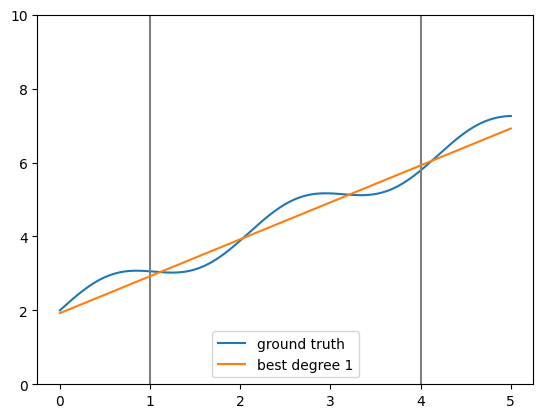

In [ ]:
import sklearn.linear_model
import sklearn.preprocessing

def plot_truth():
    plt.plot(xs, wavy(xs), label="ground truth")
    plt.gca().set_ylim(0, 10)

# this is written to handle more than just a line, so we can reuse it for higher degree polynomials.
def plot_model(degree, label=None, plot_train=False, samples=10, seed=None, xs_train=None):
    if label is None:
        label = f"degree {degree:d}"

    if seed:
        np.random.seed(seed)

    if xs_train is None:
        train_min = 1.0
        train_max = 4.0
        xs_train = np.random.uniform(train_min, train_max, size=(samples,1))
        # force entire range to be covered
        xs_train[0,0] = train_min
        xs_train[-1,0] = train_max
        # plot range of training data
        plt.axvline(x=train_min, color="grey")
        plt.axvline(x=train_max, color="grey")

    preprocessing = sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)

    model = sklearn.linear_model.LinearRegression()
    model.fit(preprocessing.fit_transform(xs_train), wavy(xs_train))

    plt.plot(xs, model.predict(preprocessing.transform(xs)), label=label)

    if plot_train:
        # plot last to be on top
        plt.plot(xs_train, wavy(xs_train), label="training", color="black", linestyle="none", marker="*")

def plot_bias(degree):
    plot_truth()
    plot_model(degree, f"best degree {degree}", samples=10000)
    plt.legend()

plot_bias(1)

None

Script:
* Regressing a line against the middle training range works pretty well.
* You can see the limits of the linear bias where it does not capture the up and down oscillations of the sine function.
* But it looks like training on this range was sufficient to capture the overall trend.
* How do you think a degree two polynomial, a quadratic function can match this range better?

## Bias of Quadratic Regression (10K samples between 1 and 4)


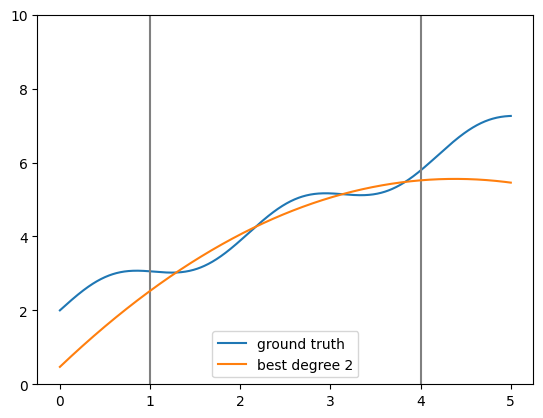

In [ ]:
plot_bias(2)

Script:
* Fitting a quadratic polynomial to the middle range captures the shape somewhat better.
* But since we know what the broader shape looks like, we know it overfit that range and missed the big picture.
* Just assessing the bias while looking at the range it was trained on, it looks like it did a little bit better, but like the linear function, it does not capture the oscillation well.

## Bias of Cubic Regression (10K samples between 1 and 4)


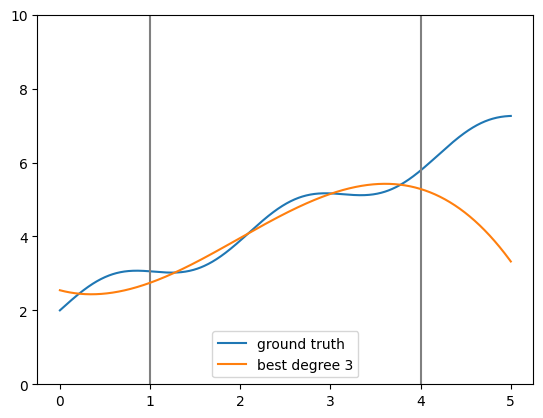

In [ ]:
plot_bias(3)

Script:
* The story with a degree three or cubic polynomial is the same.
* It fits the training range slightly better, but doesn't really get it right.


## Bias of Quartic Regression (10K samples between 1 and 4)


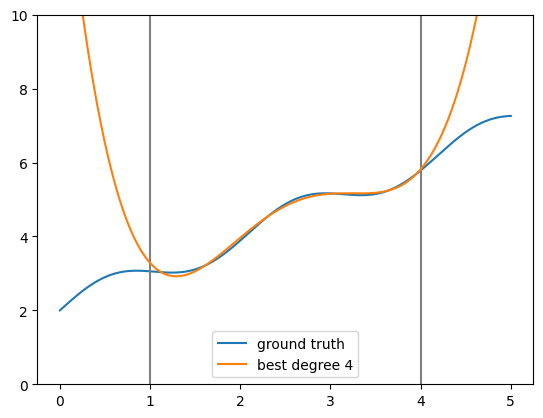

In [ ]:
plot_bias(4)

Script:
* When we get to degree 4 or quartic polynomials, we see a major improvement.
* Degree 4 gives enough flexibility to match the number of oscillations in the training range.
* So it looks a lot better.
* The shape isn't quite right, but the bias of degree 4 polynomials is a lot less in this example.
* By the way, this is a common pattern, when a model's expressiveness is increased just enough to cover the main trends, and suddenly starts matching the data well instead of picking the least bad compromise according to the loss function.

## Bias of Quintic Regression (10K samples between 1 and 4)


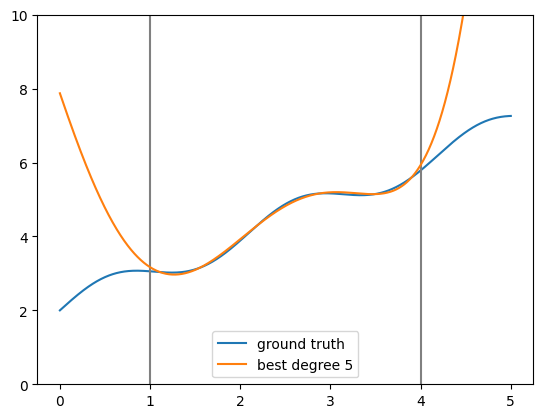

In [ ]:
plot_bias(5)

Script:
* Using a degree 5 or quintic polynomial looks qualitatively the same to degree 4.
* If you squint, the worse errors look smaller, but the improvement is tiny compared to the improvement getting to degree 4.
* We won't see much more improvement in bias by increasing the degree, so let's go back and look at the variance.

## Variance of Linear Regression (10 samples per model)


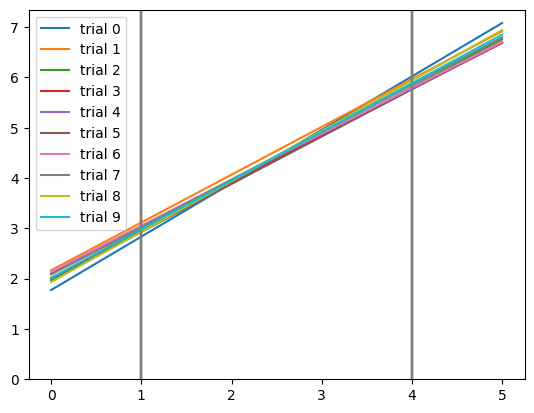

In [ ]:
def plot_variance(degree):
    np.random.seed(2024)

    for i in range(10):
        plot_model(degree, f"trial {i}", samples=10)
    plt.gca().set_ylim(0)
    plt.legend()

plot_variance(1)

Script:
* The variance of a kind of model refers to the variation in model outputs from different training inputs and other randomness in training.
* To illustrate that variance, I built 10 models, each with a different random sample of just 10 data points.
* All of the lines are close, and the variation between them is comparable to the oscillation in the wavy line.
* The lines all seem relatively close in the middle, but if you peak outside the training range, there is a bit more spread.

## Variance of Quadratic Regression (10 samples per model)


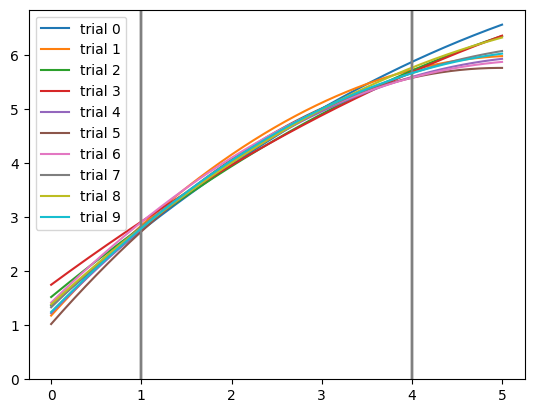

In [ ]:
plot_variance(2)

Script:
* With degree two polynomials, the predictions within the training range or similarly close, but maybe not so tight in the middle.
* Outside the training range, there is substantially more variation in predictions.
* We can also see that none of these predictions are close to the true line once outside the training data.

## Variance of Cubic Regression (10 samples per model)


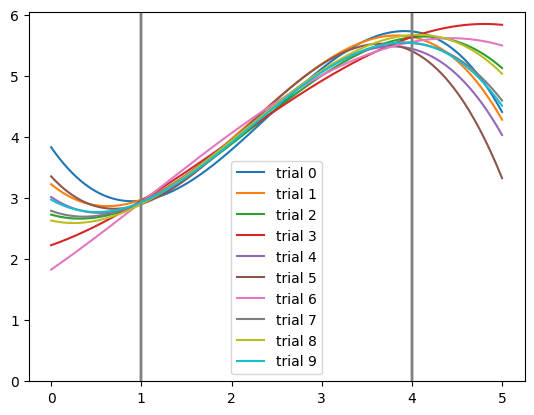

In [ ]:
plot_variance(3)

Script:
* With degree three, we see more variation inside the training range, and a lot more outside the training range.

## Variance of Quartic Regression (10 samples per model)


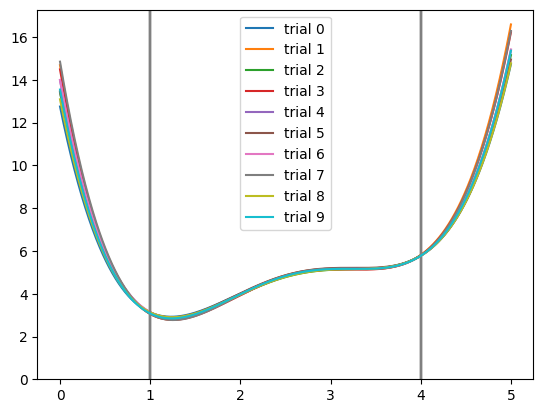

In [ ]:
plot_variance(4)

Script:
* Curiously, when we get to degree 4, the variance drops.
* We previously commented that degree 4 is when the polynomial gets flexible enough to match the overall curves in the training range.
* That seems to be helping here too.
* We still see that the function is way off outside the training range, but it seems to be off in consistent ways related to the quartic shapes.

## Variance of Quintic Regression (10 samples per model)


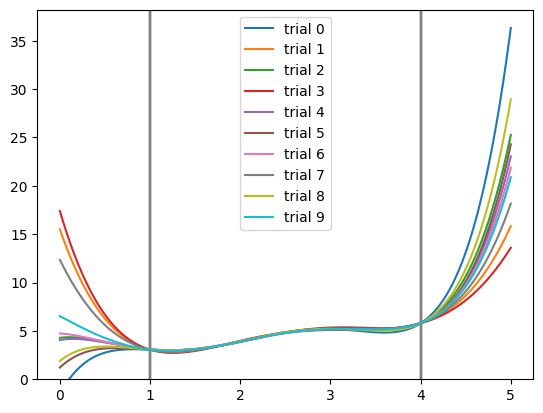

In [ ]:
plot_variance(5)

Script:
* At degree 5, we see similar close fits in the training range, but much more variation outside that range.
* While degree 4 did not have a lot of flexibility fitting the samples, we see a lot more with degree 5.

## Comparing Different Degree Polynomials (same 10 samples)


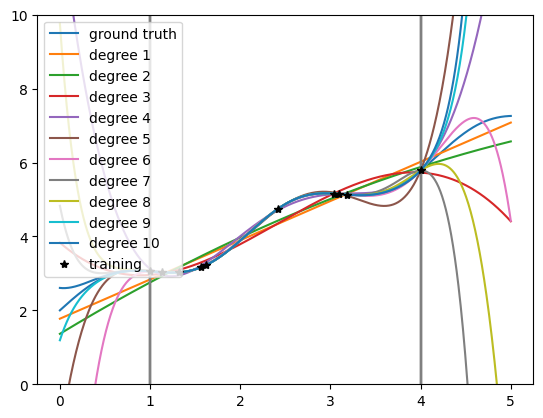

In [ ]:
plot_truth()
for degree in range(1, 11):
    plot_model(degree, seed=2024, plot_train=degree==10)

# plt.gca().set_ylim(0)
plt.legend()

None

Script:
* In this last chart, I sampled 10 points in the training range, and fit polynomial models up to degree 10.
* There's a lot of variation in those curves.
* The degree 1 and 2 models in orange and green are relatively straight, and do not fit the training points especially well.
* The degree 3 model in red is relatively straight in the training range, and also does not fit the training points well, but veers off wildly outside the training range.
* From degree 4 up, the training points are fit pretty well, but as you can see, the models are all over the place in their predictions.
* They are particularly far of outside the training range.
* But if you look at the range from $x = 3$ to $4$, there's a lot of variation there too.


## Bias and Variance Takeaways

* Bias decreases as degree increases,
  * but improvements drop when general trends captured.
* Variance increases with degree,
  * and particularly visible farther from training data.
* These trends are visible with lower degree polynomials.
  * Do not need to match degree and number of data points.

Script:
* Wrapping up, the bias and variance trends of polynomials behave as expected from the increased flexibility of higher degrees.
* But you do not need to increase the polynomial degrees to match the number of data points to see these behaviors.
* The levels of bias and variance observed have more to do with the shapes of the curves that you are trying to fit than the number of data points when you are using lower degree polynomials.
* And variance will be most visible farther away from your training data.